# Assignment 3.2: Superstore EDA

## Description
#### In this Jupyter notebook, we will perform exploratory data analysis on the Superstore dataset.

## Source
- #### `Global_Superstore_Orders_2012_2015.xlsx`

## Worksheets
- #### `Orders` - Spreadsheet with information about orders, such as products, product categories, customers, sales, etc.
- #### `People` - Salesperson and the region they manage.

## Data Dictionary
### `Orders`
- #### Row ID: Unique number for each row
- #### Order ID: Unique number for each order
- #### Order Date: Date when order was placed
- #### Ship Date: Date when order was shipped
- #### Ship Mode: Mode of transportation
- #### Customer ID: Unique number for customer
- #### Custoner Name: Name of customer
- #### Segment: Business unit
- #### Postal Code: Customer's zip code
- #### City: Customer's city
- #### State: Customer's state
- #### Country: Customer's country
- #### Region: Customer's region
- #### Market: Broader region category
- #### Product ID: Unique number for product
- #### Category: Category of product
- #### Sub-Category: Sub-category of product
- #### Sales: Dollars sold from order
- #### Quantity: Number of items on order
- #### Discount: Discount rate on order
- #### Profit: Profit made on order
- #### Shipping Cost: Shipping cost on order
- #### Order priority: Order priority on order
### `People`
- #### Person: Employee who sold the order
- #### Region: Region managed by employee

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Run this cell to properly install openpyxl, or else it'll keep throwing an error message.
# import pip
# pip.main(["install", "openpyxl"])

In [3]:
xlsx = pd.ExcelFile('data/Global_Superstore_Orders_2012_2015.xlsx')
df_orders = pd.read_excel(xlsx, 'Orders')
df_people = pd.read_excel(xlsx, 'People')

### After importing both tabs in the spreadsheet as separate dataframes, we will proceed to inspect them both.

In [4]:
df_orders.sample()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
5693,11981,ES-2012-MS1783048-41178,2012-09-26,2012-09-30,Standard Class,MS-1783048,Melanie Seite,Consumer,NaN,Berlin,...,OFF-ST-6060,Office Supplies,Storage,"Smead Shelving, Wire Frame",115.2,3,0.2,37.44,4.6,Medium


In [5]:
df_orders.shape

(51290, 24)

In [6]:
df_orders.dtypes

Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
Postal Code              float64
City                      object
State                     object
Country                   object
Region                    object
Market                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
dtype: object

In [7]:
df_orders.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,51290.0,25645.500000,14806.291990,1.000,12823.250000,25645.500,38467.7500,51290.000
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.000000,56430.500,90008.0000,99301.000
Sales,51290.0,246.490581,487.565361,0.444,30.758625,85.053,251.0532,22638.480
Quantity,51290.0,3.476545,2.278766,1.000,2.000000,3.000,5.0000,14.000
Discount,51290.0,0.142908,0.212280,0.000,0.000000,0.000,0.2000,0.850
Profit,51290.0,28.610982,174.340972,-6599.978,0.000000,9.240,36.8100,8399.976
Shipping Cost,51290.0,26.478567,57.251373,1.002,2.610000,7.790,24.4500,933.570


In [8]:
df_orders.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
Postal Code       41296
City                  0
State                 0
Country               0
Region                0
Market                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [9]:
df_people.sample()

,Person,Region
21,Angela Jephson,Western Canada


In [10]:
df_people.shape

(24, 2)

In [11]:
df_people.dtypes

Person    object
Region    object
dtype: object

In [12]:
df_people.isnull().sum()

Person    0
Region    0
dtype: int64

### After inspecting both dataframes, we see that they can be joined on the "Region" field.

In [13]:
df = df_orders.merge(df_people, on='Region')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Person
0,42433,AG-2012-TB112803-40909,2012-01-01,2012-01-06,Standard Class,TB-112803,Toby Braunhardt,Consumer,NaN,Constantine,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.30,2,0.0,106.14,35.46,Medium,Lindiwe Afolayan
1,44301,SU-2012-JC5340122-40912,2012-01-04,2012-01-08,Standard Class,JC-5340122,Jasper Cacioppo,Consumer,NaN,Khartoum,...,Office Supplies,Art,"Boston Pens, Fluorescent",15.48,1,0.0,2.61,1.82,Medium,Lindiwe Afolayan
2,44302,SU-2012-JC5340122-40912,2012-01-04,2012-01-08,Standard Class,JC-5340122,Jasper Cacioppo,Consumer,NaN,Khartoum,...,Office Supplies,Binders,"Avery Hole Reinforcements, Durable",5.91,1,0.0,2.10,1.51,Medium,Lindiwe Afolayan
3,41512,AG-2012-AC4203-40915,2012-01-07,2012-01-11,Standard Class,AC-4203,Alyssa Crouse,Corporate,NaN,Algiers,...,Office Supplies,Art,"Stanley Sketch Pad, Fluorescent",91.38,2,0.0,14.58,4.36,Medium,Lindiwe Afolayan
4,48589,EG-2012-SJ1012538-40918,2012-01-10,2012-01-12,Second Class,SJ-1012538,Sanjit Jacobs,Home Office,NaN,Cairo,...,Furniture,Tables,"Chromcraft Wood Table, Fully Assembled",967.98,2,0.0,445.26,80.13,High,Lindiwe Afolayan


### Now we can select only the columns we're interested in, rearrange them, and rename "Person" to "Salesperson"

In [14]:
cols = ['Person', 'Order ID', 'Order Date', 'Customer ID', 'Customer Name', 'Region', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']
df = df[cols]
df.sample()

,Person,Order ID,Order Date,Customer ID,Customer Name,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost
16244,Nicodemo Bautista,US-2014-PG1889582-41647,2014-01-08,PG-1889582,Paul Gonzalez,Central America,Furniture,Chairs,"Office Star Executive Leather Armchair, Red",751.488,3,0.2,-112.752,246.726


In [15]:
df.rename(columns={'Person': 'Salesperson'}, inplace=True)
df.sample()

,Salesperson,Order ID,Order Date,Customer ID,Customer Name,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost
23982,Vasco Magalhães,MX-2013-AC1042018-41576,2013-10-29,AC-1042018,Alyssa Crouse,South America,Office Supplies,Paper,"Enermax Parchment Paper, Premium",112.86,11,0.0,45.1,12.642


In [16]:
df.shape

(50906, 14)

In [17]:
df.dtypes

Salesperson              object
Order ID                 object
Order Date       datetime64[ns]
Customer ID              object
Customer Name            object
Region                   object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
Shipping Cost           float64
dtype: object

In [18]:
df.isnull().sum()

Salesperson      0
Order ID         0
Order Date       0
Customer ID      0
Customer Name    0
Region           0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Shipping Cost    0
dtype: int64

### Since we have quantitative columns, we can look at their statistical summary

In [19]:
df_stats = df.describe()
df_stats

,Sales,Quantity,Discount,Profit,Shipping Cost
count,50906.000000,50906.000000,50906.000000,50906.000000,50906.000000
mean,247.035197,3.486406,0.143986,28.476798,26.532041
std,488.507977,2.279210,0.212715,174.703710,57.337141
min,0.444000,1.000000,0.000000,-6599.978000,1.002000
25%,30.840000,2.000000,0.000000,0.000000,2.620000
50%,85.162500,3.000000,0.000000,9.200000,7.800000
75%,251.626500,5.000000,0.200000,36.824500,24.540000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [20]:
df_stats_mean = df.describe().loc[['mean', 'std']]
df_stats_mean

,Sales,Quantity,Discount,Profit,Shipping Cost
mean,247.035197,3.486406,0.143986,28.476798,26.532041
std,488.507977,2.279210,0.212715,174.703710,57.337141


### With mean and standard deviation, we can plot a box and whisker plot

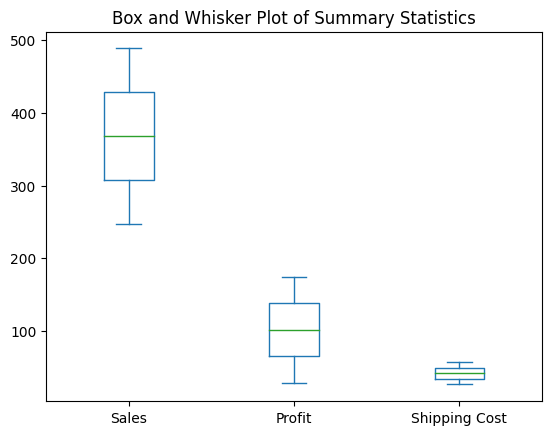

In [21]:
df_stats_mean[['Sales', 'Profit', 'Shipping Cost']].plot(kind='box')
plt.title('Box and Whisker Plot of Summary Statistics')
plt.show()

In [23]:
df_sales_category = df.groupby(["Category"]).Sales.sum().reset_index()
df_sales_category

,Category,Sales
0,Furniture,4.099857e+06
1,Office Supplies,3.757458e+06
2,Technology,4.718259e+06


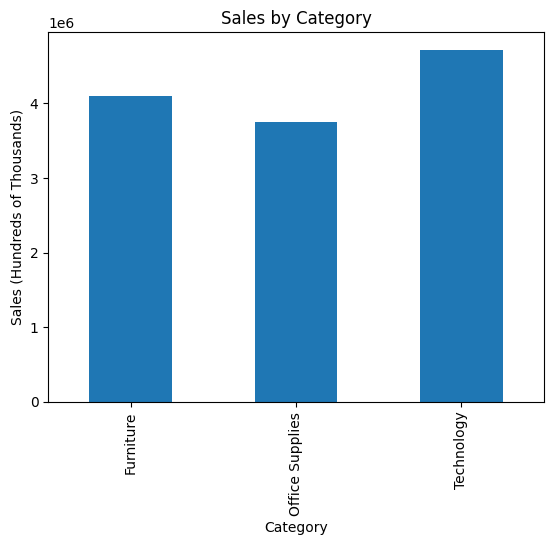

In [24]:
df_sales_category.plot(kind='bar', x='Category', y='Sales', legend=None)
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales (Hundreds of Thousands)')
plt.show()

In [26]:
df_profit_category = df.groupby(["Category"]).Profit.sum().reset_index()
df_profit_category

,Category,Profit
0,Furniture,282469.49020
1,Office Supplies,510638.29790
2,Technology,656532.11318


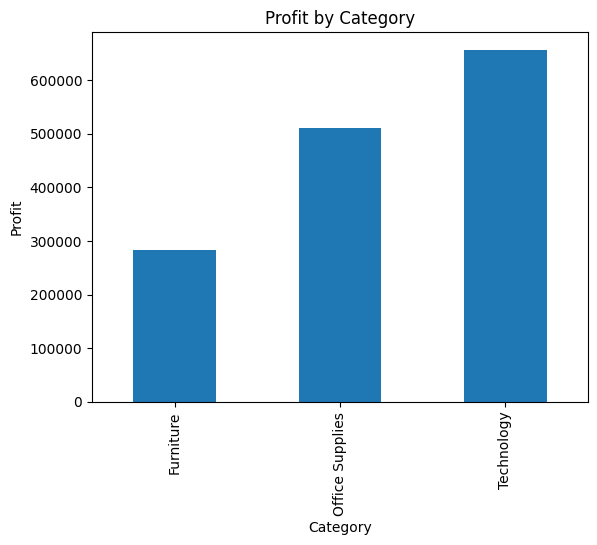

In [27]:
df_profit_category.plot(kind='bar', x='Category', y='Profit', legend=None)
plt.title('Profit by Category')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.show()